<a href="https://colab.research.google.com/github/jorgeeuan/DS_JORGE_EUAN/blob/main/DS_C3_SC2_JORGE_ANTONIO_EUAN_JIMENEZ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
"""
Reto: Análisis para abrir una nueva sucursal de comida rápida en México

Nombre del participante:

Indicaciones:

•	Guarda este archivo de la siguiente manera: NombreApellido_reto_C3SC2
•	Una vez terminado el reto deberás subirlo a la plataforma.

Instrucciones:

Bertha es una empresaria mexicana que tiene una cadena de restaurantes de comida rápida, y desea abrir una nueva sucursal que se encuentre dentro del rango de entregas a domicilio de la cadena Costco®, ya que ahí compra la materia prima para preparar los alimentos. Por ello, te han contratado para que indiques en qué región (o regiones) del país NO sería conveniente poner otra sucursal debido a la falta de cobertura de entregas a domicilio.

La información de la ubicación de las sucursales fue recuperada de la página oficial de Costco®, así como depurada y procesada para poder utilizarla para la visualización.
Para lograr lo anterior, descarga el archivo tiendas_Costco y mexican-states con sus diferentes extensiones y realiza los siguientes pasos:
1.	Crea una nueva libreta de Google Colab para programar tu script en Python.
2.	Carga los datos de los Estados de la República Mexicana en un GeoDataFrame.
3.	Carga los datos de la localización de las sucursales de Costco® en un DataFrame.
4.	Convierte los datos de la localización de las sucursales de Costco® en un GeoDataFrame, creando puntos a partir de la longitud y latitud de cada sucursal.
5.	Agrega una columna a los estados que indique la región a la que pertenecen y separa el GeoDataFrame por regiones en lugar de por estados:
a)	Centro: Tlaxcala, Puebla, CDMX, Morelos, Estado de México e Hidalgo
b)	Centro Oeste: Jalisco, Michoacán, Colima, Aguascalientes, Nayarit, Zacatecas, San Luis Potosí, Guanajuato y Querétaro.
c)	Noreste: Chihuahua, Coahuila, Nuevo León, Tamaulipas y Durango
d)	Noroeste: Baja California Norte, Baja California Sur, Sonora y Sinaloa
e)	Sureste: Guerrero, Veracruz, Oaxaca, Tabasco, Chiapas, Campeche, Yucatán y Quintana Roo
6.	Asegura que ambos GeoDataFrames utilicen el CRS epsg=3395 que usa metros como medida de distancia.
7.	Crea un buffer de 120 km alrededor de los puntos de localización de cada sucursal.
8.	Grafica la intersección de las regiones con los círculos creados a partir de la localización de las sucursales.
9.	Identifica las regiones en donde se requiere más cobertura y responde la pregunta: ¿En qué regiones del país (Centro, Centro Oeste, Noreste, Noroeste, Sureste) NO es conveniente abrir una nueva sucursal debido a la falta de cobertura de entregas a domicilio?

"""
# Montar la unidad de drive
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [27]:
# Importar de librerias
"""
1.	Crea una nueva libreta de Google Colab para programar tu script en Python.
"""
import geopandas as gpd
import pandas as pd
import os
import matplotlib.pyplot as plt

"""
2.	Carga los datos de los Estados de la República Mexicana en un GeoDataFrame.
"""
# Ruta del directorio donde se supone está el archivo
path = "/content/gdrive/MyDrive/fuentes/"
os.listdir(path)

"""
3.	Carga los datos de la localización de las sucursales de Costco® en un DataFrame.
"""
# Cargar el archivo CSV de las tiendas de Costco
path_to_costco_stores = "/content/gdrive/MyDrive/fuentes/tiendaCostco.csv"
costco_stores = pd.read_csv(path_to_costco_stores)


In [28]:
# Mostrar las primeras filas del DataFrame
print(costco_stores.head())
print(costco_stores.columns)

   id          nombre                       direccion          ubicacion  \
0   1        "Puebla"     Blvd. del Niño Poblano 2904             Puebla   
1   2   "Villa Coapa"                      Puente 186              Coapa   
2   3    "Cuernavaca"        Av. Vicente Guerrero 205         Cuernavaca   
3   4    "Lindavista"      Av. Insurgentes Norte 1320  Gustavo A. Madero   
4   5       "Mixcoac"  Blvd. Adolfo López Mateos 1181     Alvaro Obregón   

     latitud   longitud  tel centro llantero  
0  19.033499 -98.237794         222 2273 318  
1  19.284359 -99.138655                  NaN  
2  18.934481 -99.233430         777 7101 523  
3  19.481697 -99.130063         55 5747 5691  
4  19.387237 -99.190718                  NaN  
Index(['id', ' nombre', ' direccion', ' ubicacion', ' latitud', ' longitud',
       ' tel centro llantero'],
      dtype='object')


In [29]:
# Limpiar los nombres de las columnas
costco_stores.columns = costco_stores.columns.str.strip()

# Veificar los nombres de las columnas después de limpiar
print(costco_stores.columns)


"""
4.	Convierte los datos de la localización de las sucursales de Costco® en un GeoDataFrame, creando puntos a partir de la longitud y latitud de cada sucursal.
"""

# Crear el GeoDataFrame usando las columnas 'latitud' y 'longitud'
costco_stores_gdf = gpd.GeoDataFrame(
    costco_stores,
    geometry=gpd.points_from_xy(costco_stores['longitud'], costco_stores['latitud']),
    crs="EPSG:4326"
)

Index(['id', 'nombre', 'direccion', 'ubicacion', 'latitud', 'longitud',
       'tel centro llantero'],
      dtype='object')


In [30]:
# Mostrar las primeras filas del GeoDataFrame
print(costco_stores_gdf.head())

   id          nombre                       direccion          ubicacion  \
0   1        "Puebla"     Blvd. del Niño Poblano 2904             Puebla   
1   2   "Villa Coapa"                      Puente 186              Coapa   
2   3    "Cuernavaca"        Av. Vicente Guerrero 205         Cuernavaca   
3   4    "Lindavista"      Av. Insurgentes Norte 1320  Gustavo A. Madero   
4   5       "Mixcoac"  Blvd. Adolfo López Mateos 1181     Alvaro Obregón   

     latitud   longitud tel centro llantero                    geometry  
0  19.033499 -98.237794        222 2273 318  POINT (-98.23779 19.03350)  
1  19.284359 -99.138655                 NaN  POINT (-99.13865 19.28436)  
2  18.934481 -99.233430        777 7101 523  POINT (-99.23343 18.93448)  
3  19.481697 -99.130063        55 5747 5691  POINT (-99.13006 19.48170)  
4  19.387237 -99.190718                 NaN  POINT (-99.19072 19.38724)  


  ISO3166-2 admin_leve        boundary is_in_coun is_in_co_1  \
0    MX-AGU          4  administrative     México         MX   
1    MX-COL          4  administrative     México         MX   
2    MX-TLA          4  administrative     México         MX   
3    MX-CMX          4  administrative     México         MX   
4    MX-MOR          4  administrative     México         MX   

               name      name_en           name_es   name_pl   name_ru  \
0    Aguascalientes         None              None      None      None   
1            Colima         None              None      None      None   
2          Tlaxcala     Tlaxcala          Tlaxcala  Tlaxcala  Тласкала   
3  Ciudad de México  Mexico City  Ciudad de México      None      None   
4           Morelos      Morelos           Morelos   Morelos   Морелос   

    name_uk  place   ref      type wikidata       wikipedia  \
0      None   None  None      None     None            None   
1      None   None  None      None     None 

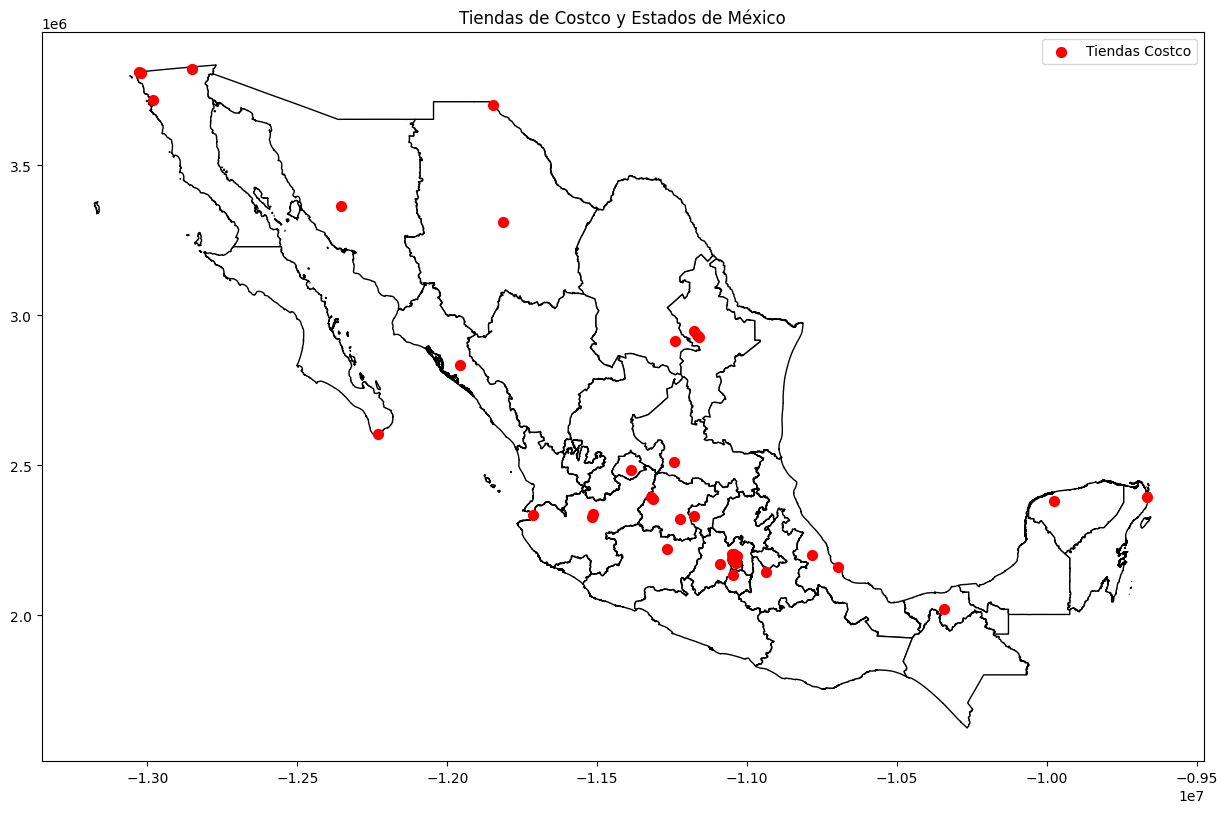

In [35]:
"""
5.	Agrega una columna a los estados que indique la región a la que pertenecen y separa el GeoDataFrame por regiones en lugar de por estados:
a)	Centro: Tlaxcala, Puebla, CDMX, Morelos, Estado de México e Hidalgo
b)	Centro Oeste: Jalisco, Michoacán, Colima, Aguascalientes, Nayarit, Zacatecas, San Luis Potosí, Guanajuato y Querétaro.
c)	Noreste: Chihuahua, Coahuila, Nuevo León, Tamaulipas y Durango
d)	Noroeste: Baja California Norte, Baja California Sur, Sonora y Sinaloa
e)	Sureste: Guerrero, Veracruz, Oaxaca, Tabasco, Chiapas, Campeche, Yucatán y Quintana Roo
"""

# Definir las regiones
regions = {
    "Centro": ["Tlaxcala", "Puebla", "CDMX", "Morelos", "Estado de México", "Hidalgo"],
    "Centro Oeste": ["Jalisco", "Michoacán", "Colima", "Aguascalientes", "Nayarit", "Zacatecas", "San Luis Potosí", "Guanajuato", "Querétaro"],
    "Noreste": ["Chihuahua", "Coahuila", "Nuevo León", "Tamaulipas", "Durango"],
    "Noroeste": ["Baja California Norte", "Baja California Sur", "Sonora", "Sinaloa"],
    "Sureste": ["Guerrero", "Veracruz", "Oaxaca", "Tabasco", "Chiapas", "Campeche", "Yucatán", "Quintana Roo"]
}

# Función para asignar región a cada estado
def get_region(state):
    for region, states in regions.items():
        if state in states:
            return region
    return None

# Agregar la columna 'region' al GeoDataFrame de los estados
mexican_states['region'] = mexican_states['name'].apply(get_region)

# Mostrar las primeras filas para verificar
print(mexican_states.head())

# Crear un GeoDataFrame por cada región
regions_gdfs = {region: mexican_states[mexican_states['region'] == region] for region in regions.keys()}

# Mostrar los nombres de las regiones y el número de estados en cada una
for region, gdf in regions_gdfs.items():
    print(f"Región: {region}, Número de Estados: {len(gdf)}")

# Visualizar los datos
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
mexican_states.plot(ax=ax, color='white', edgecolor='black')
costco_stores_gdf.plot(ax=ax, color='red', markersize=50, label='Tiendas Costco')
plt.title('Tiendas de Costco y Estados de México')
plt.legend()
plt.show()

In [21]:
# instalar geopandas pandas matplotlib
!pip install geopandas pandas matplotlib

EPSG:3395
EPSG:3395


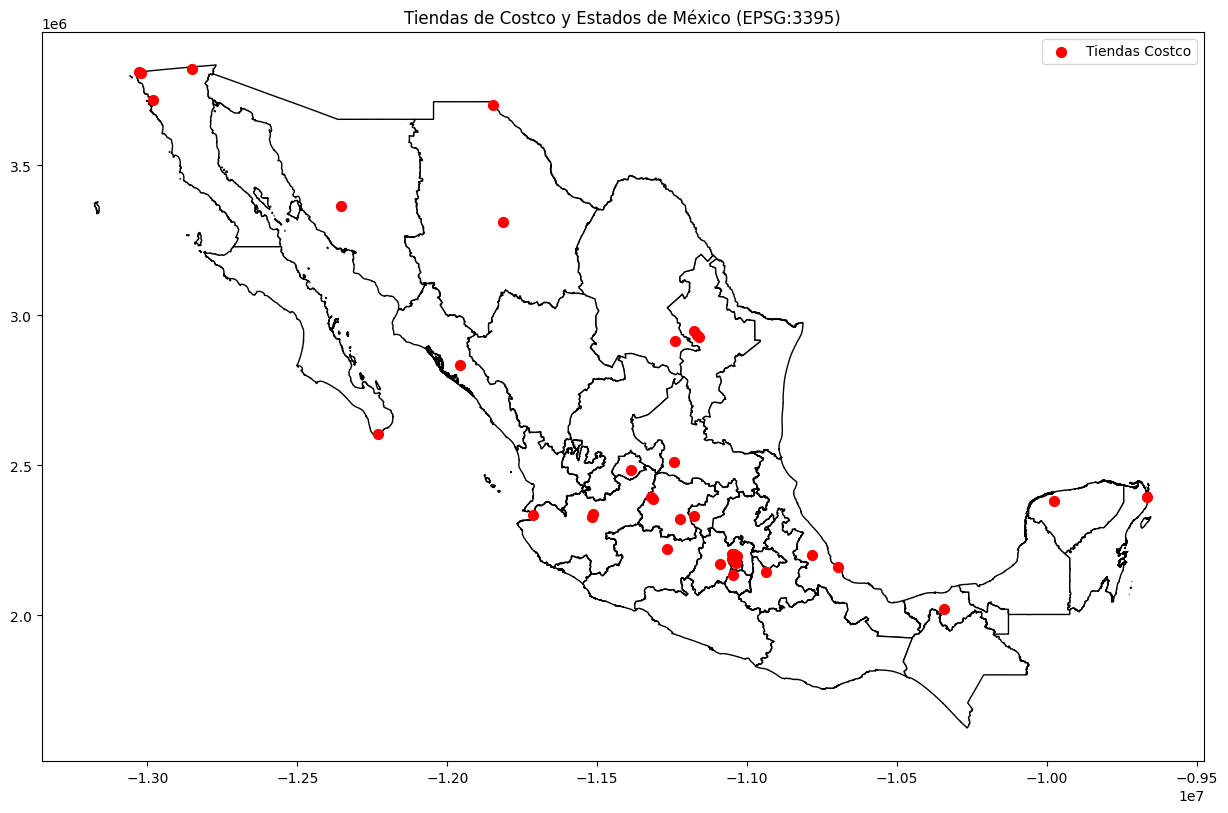

In [32]:
"""
6.	Asegura que ambos GeoDataFrames utilicen el CRS epsg=3395 que usa metros como medida de distancia.
"""

# Reproyectar ambos GeoDataFrames al CRS EPSG:3395
costco_stores_gdf = costco_stores_gdf.to_crs("EPSG:3395")
mexican_states = mexican_states.to_crs("EPSG:3395")

# Verificar el CRS de ambos GeoDataFrames
print(costco_stores_gdf.crs)
print(mexican_states.crs)

# Visualizar los datos reproyectados
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
mexican_states.plot(ax=ax, color='white', edgecolor='black')
costco_stores_gdf.plot(ax=ax, color='red', markersize=50, label='Tiendas Costco')
plt.title('Tiendas de Costco y Estados de México (EPSG:3395)')
plt.legend()
plt.show()


                                            geometry
0  POLYGON ((-10815781.179 2144952.355, -10816359...
1  POLYGON ((-10916064.551 2174338.736, -10916642...
2  POLYGON ((-10926614.869 2133365.534, -10927192...
3  POLYGON ((-10915108.091 2197487.393, -10915685...
4  POLYGON ((-10921860.248 2186403.224, -10922438...


<ipython-input-33-988ccbca8f26>:16: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


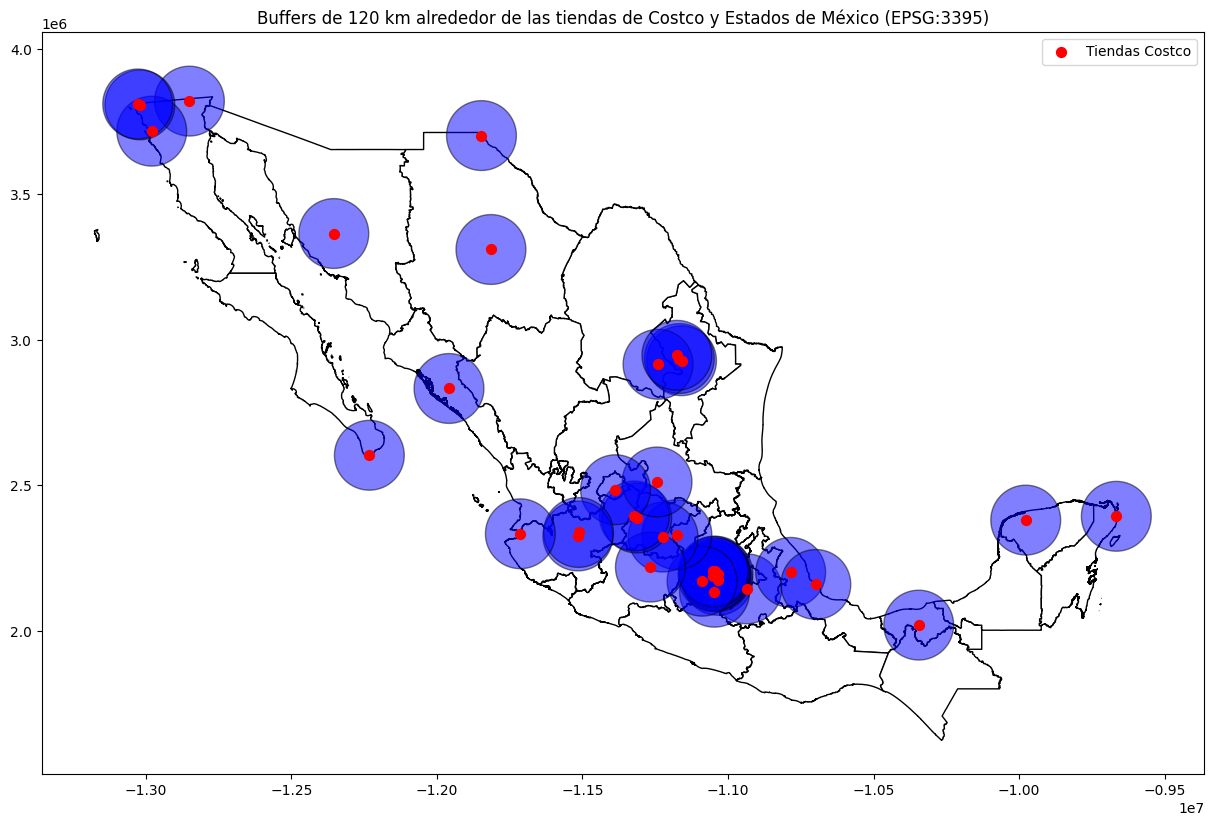

In [33]:
"""
7.	Crea un buffer de 120 km alrededor de los puntos de localización de cada sucursal.
"""

# Crear un buffer de 120 km alrededor de los puntos de localización de cada sucursal
buffer_120km = costco_stores_gdf.buffer(120000)  # 120 km = 120,000 meters

# Convertir el buffer a un GeoDataFrame
buffer_gdf = gpd.GeoDataFrame(geometry=buffer_120km, crs="EPSG:3395")

# Mostrar las primeras filas del GeoDataFrame del buffer
print(buffer_gdf.head())

# Visualizar los datos con los buffers
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
mexican_states.plot(ax=ax, color='white', edgecolor='black')
buffer_gdf.plot(ax=ax, color='blue', alpha=0.5, edgecolor='black', label='Buffer de 120 km')
costco_stores_gdf.plot(ax=ax, color='red', markersize=50, label='Tiendas Costco')
plt.title('Buffers de 120 km alrededor de las tiendas de Costco y Estados de México (EPSG:3395)')
plt.legend()
plt.show()

<ipython-input-34-d916a197ce5f>:25: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


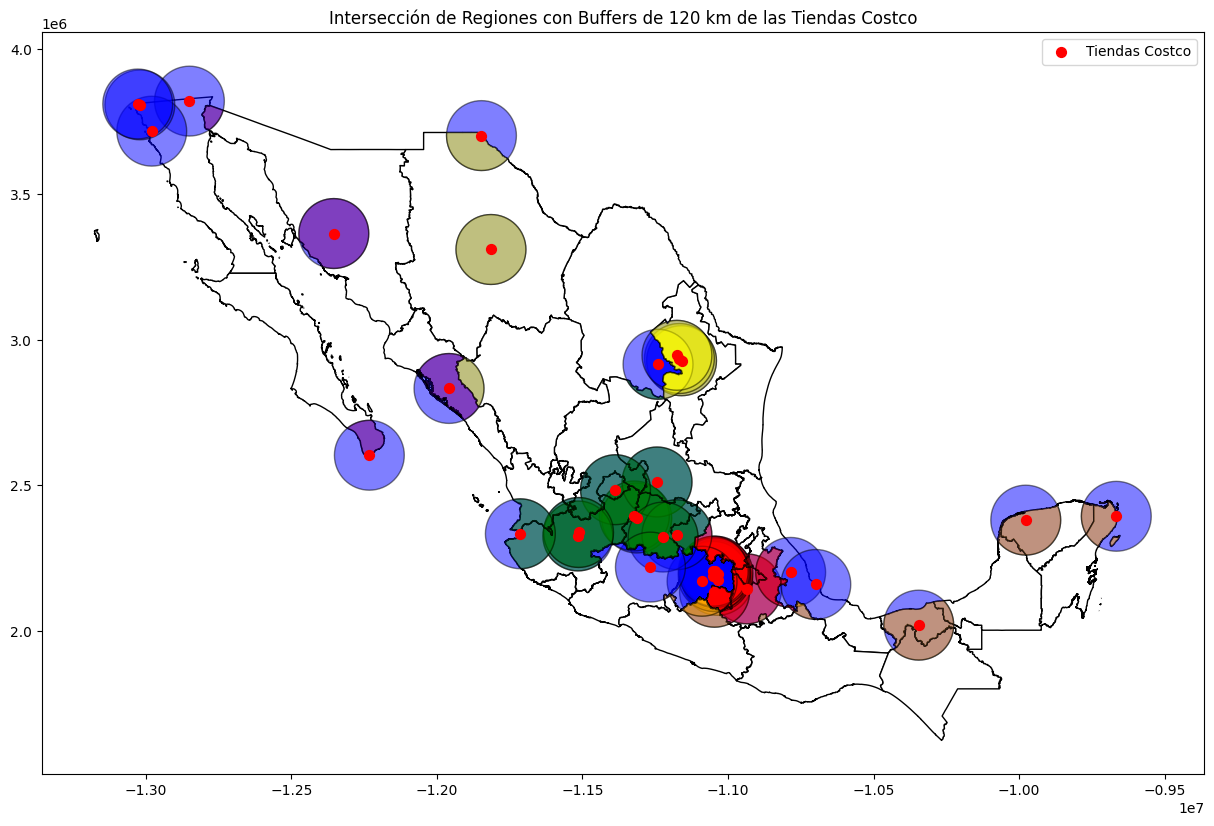

In [34]:
"""
8.	Grafica la intersección de las regiones con los círculos creados a partir de la localización de las sucursales.
"""

# Calcular la intersección de los buffers con las regiones
intersections = {}
for region, gdf in regions_gdfs.items():
    intersection = gpd.overlay(gdf, buffer_gdf, how='intersection')
    intersections[region] = intersection

# Visualizar los datos con los buffers y las intersecciones
fig, ax = plt.subplots(1, 1, figsize=(15, 15))

# Plot regions
mexican_states.plot(ax=ax, color='white', edgecolor='black')

# Plot buffers
buffer_gdf.plot(ax=ax, color='blue', alpha=0.5, edgecolor='black', label='Buffer de 120 km')

# Plot intersections
colors = ['red', 'green', 'yellow', 'purple', 'orange']
for idx, (region, intersection) in enumerate(intersections.items()):
    intersection.plot(ax=ax, color=colors[idx], alpha=0.5, edgecolor='black', label=f'Intersección {region}')

# Plot Costco stores
costco_stores_gdf.plot(ax=ax, color='red', markersize=50, label='Tiendas Costco')

plt.title('Intersección de Regiones con Buffers de 120 km de las Tiendas Costco')
plt.legend()
plt.show()